In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import *

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
import pandas
import numpy
pandas.__version__, numpy.__version__

('1.1.1', '1.19.1')

In [4]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [5]:
def accuracy(y_pred, y_true):
    right_cnt = (y_pred.argmax(-1) == y_true).sum()
    return right_cnt * 1.0 / y_true.shape[0]

model.compile(optimizer='adam', loss='ce_loss', metrics=['acc'])

In [6]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [7]:
history = model.fit(X, y,
            epochs=40,
            validation_split=0.2,
            callbacks=[k4t.callbacks.ModelCheckpoint('best_model.pt', monitor='val_acc')]
            )

Train on 120 samples, validate on 30 samples:
Epoch 1/40 - 0.0s - loss: 1.1628 - acc: 0.4219 - val_loss: 1.0974 - val_acc: 0.4000 - lr: 1e-03
[INFO] Model saved at 'best_model.pt'. The best score is 0.4000.
Epoch 2/40 - 0.0s - loss: 1.0291 - acc: 0.6094 - val_loss: 0.9953 - val_acc: 0.5333 - lr: 1e-03
[INFO] Model saved at 'best_model.pt'. The best score is 0.5333.
Epoch 3/40 - 0.0s - loss: 0.9465 - acc: 0.6901 - val_loss: 0.9281 - val_acc: 0.5333 - lr: 1e-03
Epoch 4/40 - 0.0s - loss: 0.8609 - acc: 0.7005 - val_loss: 0.8798 - val_acc: 0.5333 - lr: 1e-03
Epoch 5/40 - 0.0s - loss: 0.7832 - acc: 0.6953 - val_loss: 0.8371 - val_acc: 0.5333 - lr: 1e-03
Epoch 6/40 - 0.0s - loss: 0.7083 - acc: 0.6953 - val_loss: 0.7756 - val_acc: 0.5333 - lr: 1e-03
Epoch 7/40 - 0.0s - loss: 0.6455 - acc: 0.6875 - val_loss: 0.7153 - val_acc: 0.5333 - lr: 1e-03
Epoch 8/40 - 0.0s - loss: 0.5847 - acc: 0.6953 - val_loss: 0.6517 - val_acc: 0.5333 - lr: 1e-03
Epoch 9/40 - 0.0s - loss: 0.5262 - acc: 0.7969 - val_los

<AxesSubplot:>

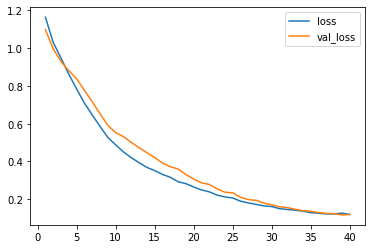

In [8]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [9]:
model.evaluate(X, y)

OrderedDict([('loss', 0.11660334), ('acc', 0.975)])

In [10]:
model.predict(X)

array([[  5.121365  ,  -0.16538604, -10.934365  ],
       [  4.4850817 ,   0.039607  ,  -9.875449  ],
       [  4.6940093 ,  -0.11239205, -10.05432   ],
       [  4.207043  ,   0.08843867,  -9.310305  ],
       [  5.137899  ,  -0.19685458, -10.904885  ],
       [  5.1150928 ,  -0.07615484, -11.061034  ],
       [  4.601173  ,  -0.10110144,  -9.828086  ],
       [  4.820149  ,  -0.05327071, -10.429219  ],
       [  4.02566   ,   0.09589384,  -8.907245  ],
       [  4.496373  ,   0.06684829,  -9.9332075 ],
       [  5.386237  ,  -0.17875876, -11.509091  ],
       [  4.4929338 ,   0.03933303,  -9.862081  ],
       [  4.478836  ,   0.03079598,  -9.835931  ],
       [  4.523688  ,  -0.16151987,  -9.601762  ],
       [  6.284482  ,  -0.4762559 , -13.1198435 ],
       [  6.0640845 ,  -0.4103148 , -12.636587  ],
       [  5.669435  ,  -0.35687888, -11.87177   ],
       [  5.059234  ,  -0.15496688, -10.807292  ],
       [  5.3301177 ,  -0.06001021, -11.584919  ],
       [  5.191851  ,  -0.19648